In [1]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [6]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 500
generations = 500
cross_over_prob = 0.8
mutation_prob = 0.06
elitism_n = 1
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size)

# Run optimzation and write to file
solution, history = ga.solve_tsp(tsp_data=tsp_data, cross_over_prob=cross_over_prob, mutation_prob=mutation_prob, elitism_n=elitism_n)
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

1343.0


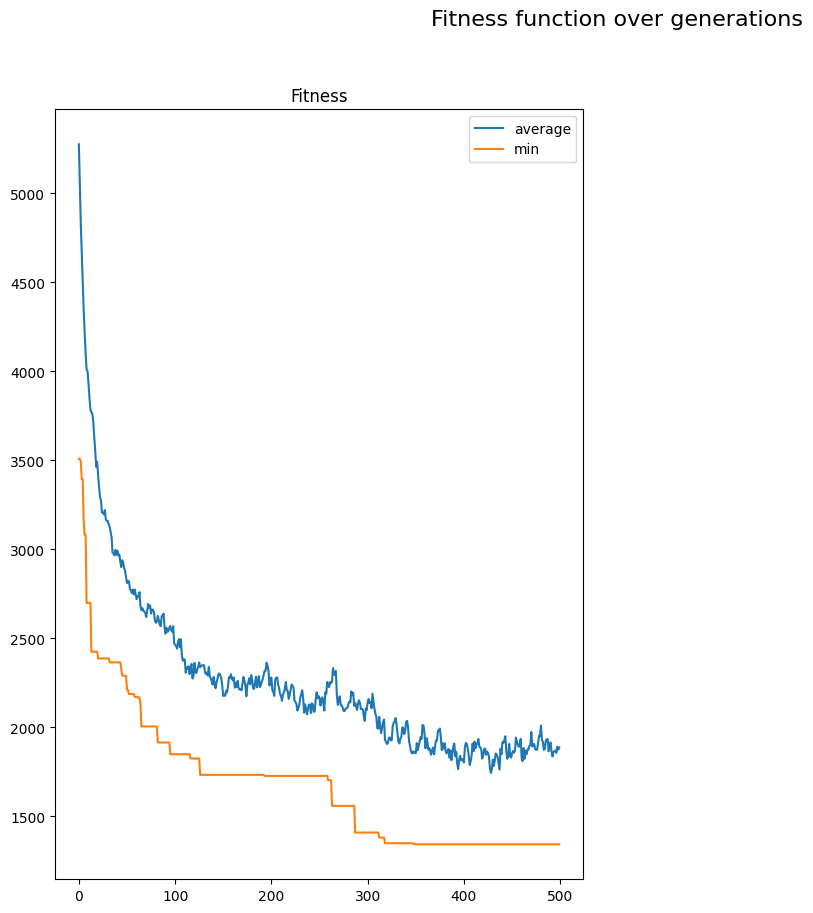

In [7]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
def plot_hist(res):
    plt.suptitle("Fitness function over generations", fontsize=16)
    ax1 = plt.subplot(121) 
    ax1.set_title("Fitness")
    av = list(map(lambda x: x.average, res))
    mn = list(map(lambda x: x.min, res))
    mx = list(map(lambda x: x.max, res))
    ax1.plot(av, label="average", alpha=1)
    ax1.plot(mn, label="min", alpha=1)
    #ax1.plot(mx, label="max", alpha=1)

    ax1.legend()

plot_hist(history)
print(history[-1].min)

### Part 2: Path Finding Through Ant Colony Optimization

In [ ]:
# Please keep your parameters for the ACO easily changeable here
gen = 1
no_gen = 1
q = 1600
evap = 0.1

# Construct the optimization objects
maze = Maze.create_maze("./../data/hard_maze.txt")
spec = PathSpecification.read_coordinates("./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route = aco.find_shortest_route(spec)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

### Synthesis

In [ ]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 1
no_gen = 1
q = 1000
evap = 0.1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")